# Jack Robbins
## Project 2 Data Analysis

Import all needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics as stats
import numpy as np

Bring the cleaned csv files back in as dataframes

In [2]:
entry_survey = pd.read_csv("cleaned_entry_survey.csv")
literacy_survey = pd.read_csv("cleaned_literacy_survey.csv")

1.) For the first observation, let's compare the racial makeup between the literacy and entry computing classes and try to get an insight into what the differences are.

Let's look at the racial makeup of students taking entry level computing classes with a pie chart

([<matplotlib.patches.Wedge at 0x133d79af0>,
 [Text(0.08582913323248613, 1.096646415162408, 'White'),
  Text(-0.9785131039544861, -0.5025058262242909, 'Hispanic'),
  Text(0.009546176673021153, -1.0999585767250182, 'Asian'),
  Text(0.7111208717243144, -0.8392300672628761, 'Multi-racial'),
  Text(0.9666229106557898, -0.5250144270354189, 'Black'),
  Text(1.078786144196332, -0.21498943018207003, 'No reply'),
  Text(1.0997054477109092, -0.025454435270682196, 'Native American')])

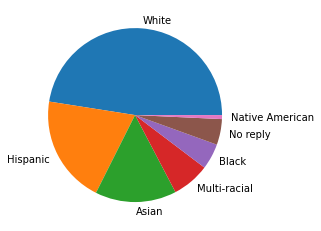

In [3]:
entry_survey["race"].value_counts()
plt.pie(entry_survey["race"].value_counts(), labels = ['White', 'Hispanic', 'Asian', 'Multi-racial', 'Black', 'No reply', 'Native American'])

Let's see if the story changes when we do the same thing to the literacy survey

([<matplotlib.patches.Wedge at 0x133e639d0>,
 [Text(-0.23287432407041447, 1.0750672300785415, 'White'),
  Text(-0.5683691798129096, -0.9417836670057518, 'Hispanic'),
  Text(0.3358587469933428, -1.047472625927791, 'Asian'),
  Text(0.7470724465859938, -0.8073925684275386, 'Multi-racial'),
  Text(0.9877365256579603, -0.4841245251803938, 'Black'),
  Text(1.088385819991432, -0.15942492540872766, 'No reply'),
  Text(1.0999482917805952, -0.010665618076374868, 'Native American')])

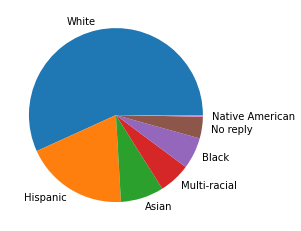

In [4]:
literacy_survey["race"].value_counts()
plt.pie(literacy_survey["race"].value_counts(), labels = ['White', 'Hispanic', 'Asian', 'Multi-racial', 'Black', 'No reply', 'Native American'])

As we can see from these pie charts, it is actually the computing literacy courses that are more dominated by white students. We can take the computing literacy survey and the racial makeup of it to be representative of the ccm student body, since every student at ccm is required to take a computing literacy course. This means that when compared to the entire student body, the computing entry courses are actually more diverse and by extension the computing degrees are more diverse than the student body at CCM. Most notably, there are more asian students who are in the computing programs at ccm when compared to the entire student body.

2.) For the next insight, let's look at the interest levels of students in the computing literacy courses when compared to the course that they took.

In [5]:
#First group by coursename and aggregate by the mean interest level
grouped_coursename = literacy_survey.groupby("coursename").agg({'interest_level':'mean'}).reset_index()
# For graph readability, rename the long coursenames to just their number codes
grouped_coursename["coursename"] = np.where(grouped_coursename["coursename"].str.contains("101"), "CMP 101", grouped_coursename["coursename"])
grouped_coursename["coursename"] = np.where(grouped_coursename["coursename"].str.contains("135"), "CMP 135", grouped_coursename["coursename"])
grouped_coursename["coursename"] = np.where(grouped_coursename["coursename"].str.contains("126"), "CMP 126", grouped_coursename["coursename"])
grouped_coursename.columns = ['coursename', 'interest_level']
grouped_coursename

,coursename,interest_level
0,CMP 101,2.711864
1,CMP 126,2.503817
2,CMP 135,2.604478


Text(0, 0.5, 'Mean interest level')

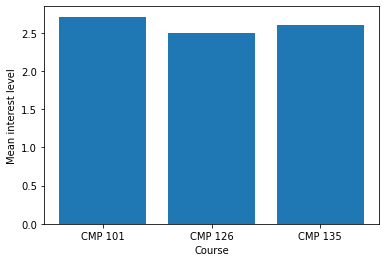

In [6]:
# Make a bar chart graphing mean interest level vs. coursename
plt.bar(grouped_coursename["coursename"],grouped_coursename['interest_level'])
plt.xlabel("Course")
plt.ylabel('Mean interest level')

As the bar graph demonstrates, CMP 101 Computer Information literacy is the class that generated the highest mean interest level, though not by much. What we learn from this is that all of these computing literacy courses only generate about a mean interest level of 2.5. Based on this, the department could take steps to make these courses more interesting to general students taking them. Unfortunately the data do not say why the students picked these interest levels, so that is about all we can say.

Is the IT website an effective form of outreach for students taking a computer literacy course? How about for students in a computing entry course?

([<matplotlib.patches.Wedge at 0x133f77670>,
 [Text(-0.6738605836330974, 0.8694319489331305, 'No'),
  Text(0.24328725304402898, -1.0727587391889617, 'Yes'),
  Text(0.9969385560680448, -0.4648801086570193, 'Do not recall')])

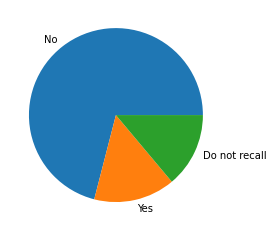

In [7]:
# Graph the literacy heard_it_website
plt.pie(literacy_survey["heard_it_website"].value_counts(), labels = ["No", "Yes", "Do not recall"])

([<matplotlib.patches.Wedge at 0x133fc09a0>,
 [Text(-0.04935141333170312, 1.0988923687068555, 'No'),
  Text(-0.23601386444221384, -1.0743823601451452, 'Yes'),
  Text(1.0627118007233904, -0.28397821853664923, 'Do not recall')])

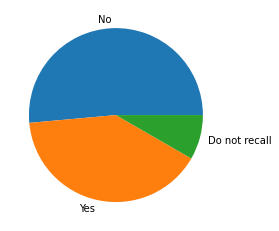

In [8]:
# Graph the heard_it_website for the entry survey
plt.pie(entry_survey["heard_it_website"].value_counts(), labels = ["No", "Yes", "Do not recall"])

As the charts show, the It website was more effective outreach for students in computing entry programs than it was for the computing literacy students. Based on this, the department should try and put the IT website in front of more students in the general population, which is represented by the computing literacy survey. It may be the case that putting this website in front of students in the computing literacy courses would help increase enrollment for these courses and maybe even increase their interest levels.

4.) For the final insight, let's look at the average computing interest by gender to see if there is a clear distinction.

In [9]:
#Group the literacy survey by gender and the mean interest level
grouped_gender_lit = literacy_survey.groupby("gender").agg({'interest_level':'mean'}).reset_index()
grouped_gender_lit

,gender,interest_level
0,I do not identify,1.000000
1,Man,2.765217
2,Non-binary,2.000000
3,Prefer not to say,1.833333
4,Woman,2.517588


In [10]:
# Group the entry survey by gender and the mean interest level
grouped_gender_entry = entry_survey.groupby("gender").agg({'interest_level':'mean'}).reset_index()
grouped_gender_entry

,gender,interest_level
0,I do not identify,3.000000
1,Man,3.547170
2,Non-binary,NaN
3,Prefer not to say,3.333333
4,Woman,3.437500


Text(0.5, 1.0, 'Mean Interest Level does not differ much between men and women')

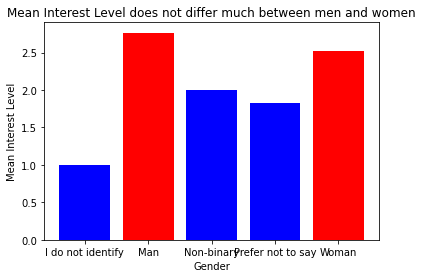

In [15]:
# Graph interest level against gender
plt.bar(grouped_gender_lit["gender"], grouped_gender_lit["interest_level"], color = ['blue', 'red', 'blue', 'blue', 'red' ])
plt.xlabel('Gender')
plt.ylabel('Mean Interest Level')
plt.title('Mean Interest Level does not differ much between men and women')

Text(0.5, 1.0, 'Mean Interest Level does not differ much between men and women')

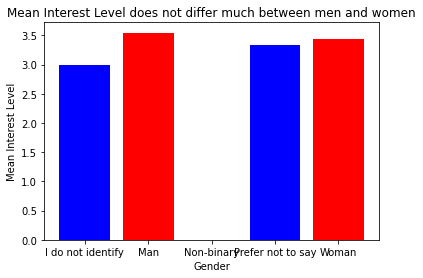

In [16]:
# Graph interest level against gender
plt.bar(grouped_gender_entry["gender"], grouped_gender_entry["interest_level"], color = ['blue', 'red', 'blue', 'blue', 'red' ])
plt.xlabel('Gender')
plt.ylabel('Mean Interest Level')
plt.title('Mean Interest Level does not differ much between men and women')

As these graphs show, the mean interest level between men and women is about the same for both the computing entry survey and the computing literacy survey. From this we can deduce that the department has done a good job appealing to both male and female students and keeping them interested. Another key takeaway is that all of the mean interest levels were a good bit higher for students in entry classes when compared to those in literacy classes. This again shows that the department should focus on making literacy courses more interesting to students in them.